### Classification using pytorch and Resnet50

## Importing pytorch and downloading the model

In [ ]:
import torch
var1 = True
neg_num = -1
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=var1)
newmodel = torch.nn.Sequential(*(list(model.children())[:neg_num]))

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

*Import* all the necessary libraries

In [ ]:
import urllib as path_files
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: 
  path_files.URLopener().retrieve(url, filename)
except: 
  path_files.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)

stds = [0.229, 0.224, 0.225]
resizing_ratio = 32
means = [0.485, 0.456, 0.406]

preprocess = transforms.Compose([
    transforms.Resize(resizing_ratio),
    transforms.ToTensor(),
    transforms.Normalize(mean=means, std=stds),
])

zer = 0
input_tensor= preprocess(input_image)
input_batch = input_tensor.unsqueeze(zer) 

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    newmodel.to('cuda')

with torch.no_grad():
    output = newmodel(input_batch)

probabilities = torch.nn.functional.softmax(output[0], dim=0)


transformations


In [ ]:
import torchvision
import numpy as np
nor1 = [0.5, 0.5, 0.5]
nor2 = [0.5, 0.5, 0.5]
resize_factor = 224

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(resize_factor),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(nor1, nor2)
])

Creation of train and test dataset

In [ ]:
from torchvision.datasets import STL10
trainset, testset = STL10('/content',transform=transform, download = True), STL10('/content',"test",transform=transform)

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting /content/stl10_binary.tar.gz to /content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataloaders Initialization

In [ ]:
trainloader, testloader = torch.utils.data.DataLoader(trainset, batch_size=1,shuffle=False), torch.utils.data.DataLoader(testset, batch_size=1,shuffle=False)


DataLoaders Testing 

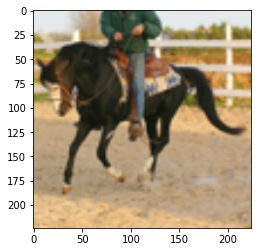

horse


In [ ]:
classes = list()
import matplotlib
class_present = ['airplane','bird','car','cat','deer','dog','horse','monkey','ship','truck']

for i in class_present:
  classes.append(i)

def imshow(img):
     num = 0.5
     temp = 2
     one =1
     zero, two = 0,2
     img = img / temp + num
     npimg = img.numpy()
     matplotlib.pyplot.imshow(np.transpose(npimg, (one, temp, zero)))
     matplotlib.pyplot.show()

dataiter = iter(testloader)
images, labels = next(dataiter)   
imshow(torchvision.utils.make_grid(images))
one = 1
print(' '.join('%5s' % classes[labels[j]] for j in range(one)))

Training Dataset Creation to feed that data into SVM Classifier

In [ ]:
x_train, y_train = list(), list()

Shifting our Data to GPU for Faster computations

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
if torch.cuda.is_available():
    newmodel.to('cuda')

Here features are extracted from the training set and stored in x_train

In [ ]:
range_num = 1
for i in range(range_num):
  with torch.no_grad():
    for data ,label in trainloader:
      data = data.to(device)
      output = newmodel(data)
      np_arr, np_arrlabel = output.cpu().detach().numpy(), label.cpu().detach().numpy()
      x_train.append(np_arr)
      y_train.append(np_arrlabel)

In [ ]:
x_train = np.array(x_train)

In [ ]:
X_trainv2 = list()

for i in range(5000):
  x = x_train[i]
  x = np.ravel(x)
  X_trainv2.append(x)

In [ ]:
X_trainv2, y_train = np.array(X_trainv2), np.array(y_train)

Here features are extracted from the training set and stored in x_test

In [ ]:
x_test, y_test = list(), list()

for i in range(1):
  with torch.no_grad():
    for data ,label in testloader:
      data = data.to(device)
      output = newmodel(data)
      np_arr,np_arrlabel  = output.cpu().detach().numpy(), label.cpu().detach().numpy()
      x_test.append(np_arr)
      y_test.append(np_arrlabel)


In [ ]:
X_test = list()

for i in range(8000):
  x = x_test[i]
  x = np.ravel(x)
  X_test.append(x)

X_test, y_test = np.array(X_test), np.array(y_test)

SVM is created and optimized for tuning efficiency and trained on features extracted from the trainset

Apply grid search cross validation for finding the best set of parameters through defining parameter range


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

l1 = [0.1, 1, 10, 100]
l2 = [1, 0.1, 0.01, 0.001]
l3 = ['poly']
# defining parameter range
param_grid = {'C': l1,
              'gamma': l2,
              'kernel': l3}

# apply grid search cross validation for finding the best set of parameters
three = 3
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = three)
grid.fit(X_trainv2, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.834 total time=  12.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.839 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.825 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.852 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.814 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.834 total time=  12.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.839 total time=  12.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.826 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.852 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.814 total time=  12.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.812 total time=  16.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.831 total time=  17.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.808 total time=  16.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.821 total time=  16.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.801 total time=  17.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.677 total time=  25.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.675 total time=  26.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.661 total time=  25.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.666 total time=  25.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.672 total time=  25.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.834 total time=  12.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.839 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.825 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.852 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.814 total time=  12.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.834 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.839 total time=  12.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.826 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.852 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.814 total time=  12.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.841 total time=  11.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.850 total time=  11.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.832 total time=  11.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.857 total time=  11.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.823 total time=  11.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.677 total time=  25.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.675 total time=  26.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.661 total time=  25.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.666 total time=  25.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.672 total time=  25.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.834 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.839 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.825 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.852 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.814 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.834 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.839 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.826 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.852 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.814 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.835 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.839 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.825 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.852 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.814 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.678 total time=  25.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.675 total time=  26.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.664 total time=  24.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.667 total time=  25.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.673 total time=  25.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.834 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.839 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.825 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.852 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.814 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.834 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.839 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.826 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.852 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.814 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.835 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.839 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.825 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.852 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.814 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.812 total time=  16.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.831 total time=  16.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.808 total time=  17.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.821 total time=  16.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.801 total time=  16.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly']},
             verbose=3)

Train SVM Model on best parameters. 
(SVM accuracy by applying bigram and Chi-square feature selection with 70% feature reduction increased 0.95% has an accuracy of 97.35%. SVM accuracy by applying unigram and Chi-square feature selection with 90% reduction features increased by 1.58% with the highest accuracy value 97.98%)

In [ ]:
from sklearn.svm import SVC
gamma_param = 0.01
C_param = 1
clf2 = SVC(kernel='poly', C=C_param, gamma=gamma_param, probability=True).fit(X_trainv2,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Code for finding the accuracy using code from Scratch

In [ ]:
def accuracy(y_test, pred):
  ans = 0
  num = 1
  for actual_value, predicted_value in zip(y_test, pred):
    if(actual_value == predicted_value):
      ans = ans+num
  value, value1 = 8000, 100 
  final = (ans/value)*value1 
  return final

Calculation of one vs one confusion matrix having parameters such as TP,FP,TN,FN 

In [ ]:
def confusionmatrixperclass(pc,nc,y_test, pred):
  fp, fn, tp, tn = 0, 0, 0, 0

  for actual_value, predicted_value in zip(y_test, pred):
      num = 1
      if predicted_value == pc and actual_value == pc:
        tp = tp+num
      elif predicted_value == pc and actual_value != pc:
        fp = fp+num
      elif predicted_value == nc and actual_value == nc:
        tn = tn+num
      elif predicted_value == nc and actual_value != nc:
        fn = fn+num
  cm = [
      [tn, fp],
      [fn, tp]
  ]
  return cm 

In [ ]:
from sklearn.metrics import confusion_matrix

importing pandas, seaborn, matplotlkib for ploting and visual representation

In [ ]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib

In [ ]:
def calculate_tpr_fpr(y_real, y_pred):

    cm = confusion_matrix(y_real, y_pred)
    TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
    tpr, fpr =  TP/(TP + FN), 1 - TN/(TN+FP) 
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    uyt = 0
    tpr_list, fpr_list = [uyt], [uyt]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tre1, tre2 = y_real, y_pred
        tpr, fpr = calculate_tpr_fpr(tre1, tre2)
        tpr_final, fpr_final = tpr, fpr
        tpr_list.append(tpr_final)
        fpr_list.append(fpr_final)
    return tpr_list, fpr_list


def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        five = 5
        matplotlib.pyplot.figure(figsize = (five, five))
        ax = matplotlib.pyplot.axes()
    if scatter:
        seaborn.scatterplot(x = fpr, y = tpr, ax = ax)
    seaborn.lineplot(x = fpr, y = tpr, ax = ax)
    xx, yy = -0.05, 1.05
    xer, one = 0,1
    seaborn.lineplot(x = [xer, one], y = [xer, one], color = 'green', ax = ax)
    matplotlib.pyplot.xlim(xx,yy)
    matplotlib.pyplot.ylim(xx,yy)
    matplotlib.pyplot.xlabel("False Positive Rate")
    matplotlib.pyplot.ylabel("True Positive Rate")

In [ ]:
prob, pred = clf2.predict_proba(X_test), clf2.predict(X_test)
classes = clf2.classes_

In [ ]:
pred, prob = np.array(pred), np.array(prob)

In [ ]:
def func(c,y_test):
  list_comp = [1 if i == c else 0 for i in y_test]
  return list_comp

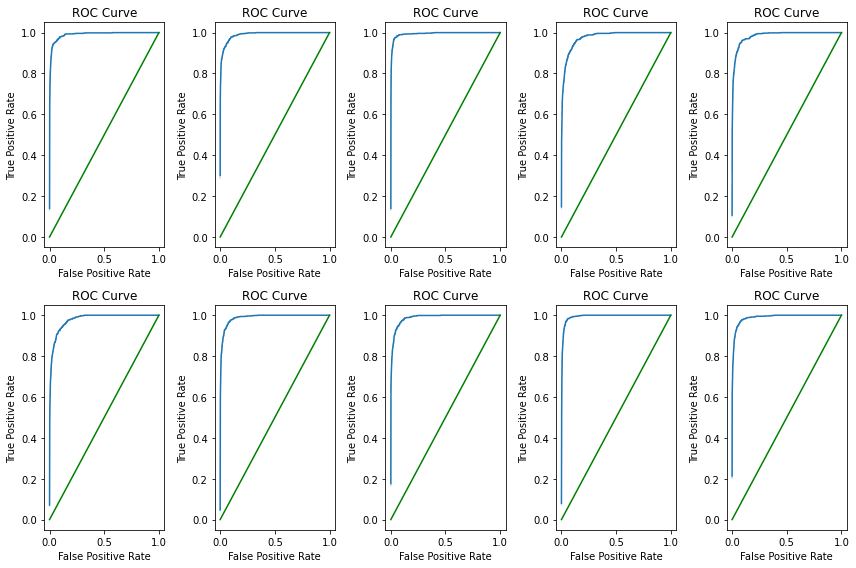

In [ ]:
matplotlib.pyplot.figure(figsize = (12, 8))
from sklearn.metrics import roc_auc_score
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = dict()

for i in range(len(classes)):
    c = classes[i]
    val1, val2 = func(c,y_test), prob[:, i]    
    two, five, one = 2,5,1
    ax_bottom = matplotlib.pyplot.subplot(two, five, i+one)
    tpr, fpr = get_all_roc_coordinates(val1, val2)
    val = False
    plot_roc_curve(tpr, fpr, scatter = val, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve")
    
    roc_auc_ovr[c] = roc_auc_score(val1, val2)
    
matplotlib.pyplot.tight_layout()


In [ ]:
ten_num = 10
for i in range(0,ten_num):
  for j in range(0,ten_num):
    cm = confusionmatrixperclass(i,j,y_test,pred)
    print("confusion matrix for positive class ",i," and negative class ",j,"\n")
    print(cm)
    print("\n")

confusion matrix for positive class  0  and negative class  0 

[[0, 117], [0, 702]]


confusion matrix for positive class  0  and negative class  1 

[[679, 117], [100, 702]]


confusion matrix for positive class  0  and negative class  2 

[[718, 117], [76, 702]]


confusion matrix for positive class  0  and negative class  3 

[[651, 117], [222, 702]]


confusion matrix for positive class  0  and negative class  4 

[[670, 117], [146, 702]]


confusion matrix for positive class  0  and negative class  5 

[[611, 117], [137, 702]]


confusion matrix for positive class  0  and negative class  6 

[[655, 117], [92, 702]]


confusion matrix for positive class  0  and negative class  7 

[[676, 117], [140, 702]]


confusion matrix for positive class  0  and negative class  8 

[[720, 117], [132, 702]]


confusion matrix for positive class  0  and negative class  9 

[[657, 117], [99, 702]]


confusion matrix for positive class  1  and negative class  0 

[[702, 100], [117, 679]]


confus